# Examples of querying NIST XCOM cross section data

The following examples demonstrate how to access cross section data from the [NIST XCOM database](http://physics.nist.gov/PhysRefData/Xcom/html/xcom1.html) directly from Python.

First, import necessary tools:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 120)
import becquerel as bq

We will use the following code to mimic the plots on the NIST website:

In [2]:
from becquerel.tools import xcom

PLOT_KWARGS = {
    'total_w_coh': {
        'label': xcom.COLUMNS_LONG['total_w_coh'],
        'color': 'black',
        'lw': 3,
        'ls': '-',
    },
    'total_wo_coh': {
        'label': xcom.COLUMNS_LONG['total_wo_coh'],
        'color': 'green',
        'lw': 3,
        'ls': '--',
    },
    'coherent': {
        'label': xcom.COLUMNS_LONG['coherent'],
        'color': 'orange',
        'lw': 1,
        'ls': '--',
    },
    'incoherent': {
        'label': xcom.COLUMNS_LONG['incoherent'],
        'color': 'blue',
        'lw': 1,
        'ls': ':',
    },
    'photoelec': {
        'label': xcom.COLUMNS_LONG['photoelec'],
        'color': 'magenta',
        'lw': 1,
        'ls': '-',
    },
    'pair_nuc': {
        'label': xcom.COLUMNS_LONG['pair_nuc'],
        'color': 'cyan',
        'lw': 1,
        'ls': '-',
    },
    'pair_elec': {
        'label': xcom.COLUMNS_LONG['pair_elec'],
        'color': 'cyan',
        'lw': 1,
        'ls': '--',
    },
}


def plot_xcom(xcom_data, title):
    """Plot the XCOM data in the same fashion as the website."""
    fig = plt.figure(figsize=(9, 10.7))
    axis = fig.gca()
    axis.set_position([0.13, 0.25, 0.62, 0.64])
    erg = xcom_data['energy'] / 1000.  # MeV
    for field in ['total_w_coh', 'total_wo_coh', 'coherent', 'incoherent',
                  'photoelec', 'pair_nuc', 'pair_elec']:
        plt.loglog(erg, xcom_data[field], **PLOT_KWARGS[field])
    plt.xlim(erg.min(), erg.max())
    plt.legend(
        prop={'size': 8}, loc='upper left',
        bbox_to_anchor=(0., -0.35, 1., 0.25))
    plt.title('fetch_xcom_data result:\n' + title)
    plt.xlabel('Photon Energy (MeV)')
    plt.ylabel(r'Cross Section (cm$^2$/g)')

## Example 1: Cross section data for an element (Pb)

The NIST website gives the following plot:

<img src="figures/xcom_element.png" style="width: 600px;" align="left"/>

### 1a: Look up by element symbol (Pb)

You can query XCOM using an element symbol, like `'Pb'`:

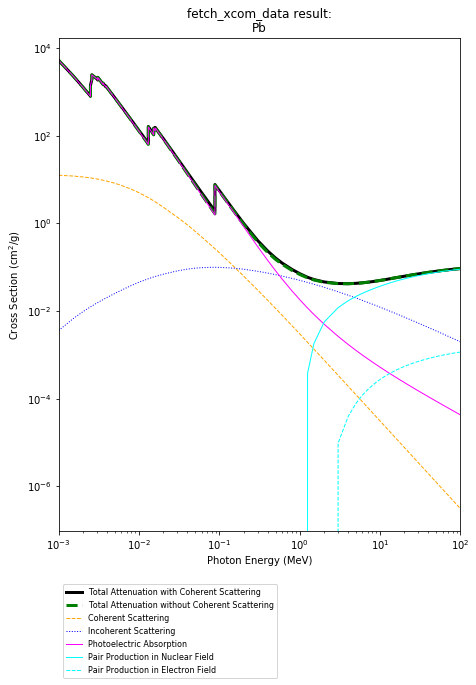

In [3]:
xd = bq.tools.fetch_xcom_data('Pb', e_range_kev=[1., 100000.])
plot_xcom(xd, 'Pb')
plt.show()

### 1b: Look up by atomic number (Z)

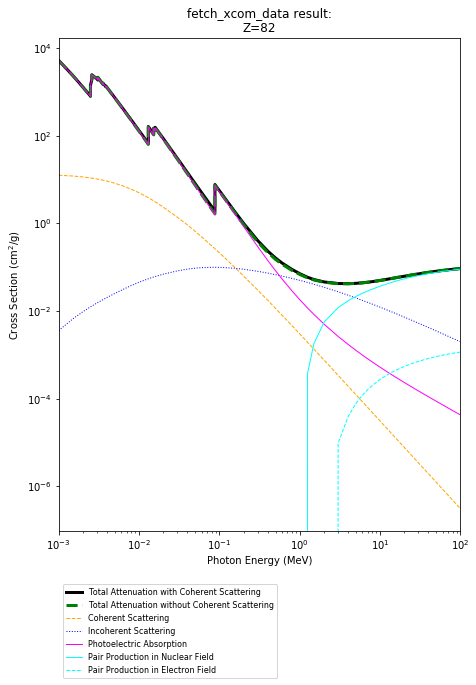

In [4]:
xd = bq.tools.fetch_xcom_data(82, e_range_kev=[1., 100000.])
plot_xcom(xd, 'Z=82')
plt.show()

The function `fetch_xcom_data` returns a pandas DataFrame:

In [5]:
print(xd)

        energy      coherent  incoherent    photoelec  pair_nuc  pair_elec  total_w_coh  total_wo_coh
0        1.000  1.251000e+01    0.003587  5197.000000  0.000000   0.000000   5209.00000    5197.00000
1        1.500  1.201000e+01    0.006601  2344.000000  0.000000   0.000000   2356.00000    2344.00000
2        2.000  1.144000e+01    0.009620  1274.000000  0.000000   0.000000   1285.00000    1274.00000
3        2.484  1.088000e+01    0.012400   790.000000  0.000000   0.000000    800.90000     790.00000
4        2.484  1.088000e+01    0.012400  1385.000000  0.000000   0.000000   1396.00000    1385.00000
5        2.534  1.082000e+01    0.012680  1636.000000  0.000000   0.000000   1647.00000    1636.00000
6        2.586  1.076000e+01    0.012970  1933.000000  0.000000   0.000000   1944.00000    1933.00000
7        2.586  1.076000e+01    0.012970  2439.000000  0.000000   0.000000   2450.00000    2439.00000
8        3.000  1.027000e+01    0.015250  1955.000000  0.000000   0.000000   1965.

## Example 2: Cross section data for a compound (H<sub>2</sub>O)

The NIST website gives the following plot for water:

<img src="figures/xcom_compound.png" style="width: 600px;" align="left"/>

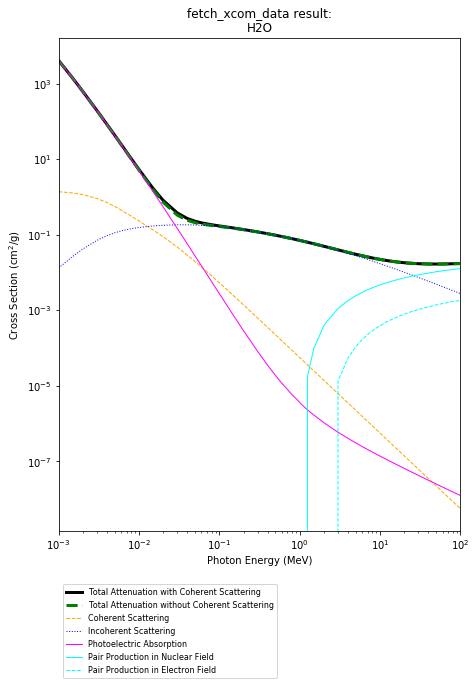

In [6]:
xd = bq.tools.fetch_xcom_data('H2O', e_range_kev=[1., 100000.])
plot_xcom(xd, 'H2O')
plt.show()

## Example 3: Cross section data for a mixture (salt water)

The NIST website gives the following plot for a mixture of NaCl and water:

<img src="figures/xcom_mixture.png" style="width: 600px;" align="left"/>

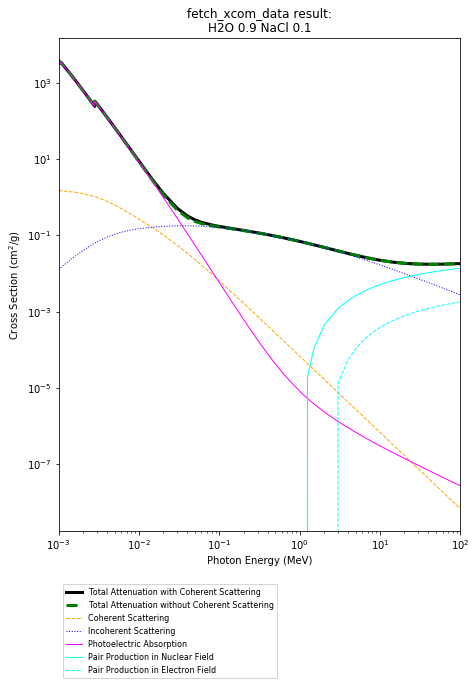

In [7]:
mixture = ['H2O 0.9', 'NaCl 0.1']  # note: must be iterable of strings
xd = bq.tools.fetch_xcom_data(mixture, e_range_kev=[1., 100000.])
plot_xcom(xd, ' '.join(mixture))
plt.show()